In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()
train_n = x_train.shape[0]
val_n = x_val.shape[0]

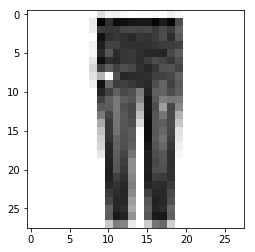

1


In [3]:
x_train = x_train.reshape(train_n,28,28,1).astype('float32') / 255.0
x_val = x_val.reshape(val_n,28,28,1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

exampleindex = 200
digitimage = x_val[exampleindex,:,:,0]
digitlabel = np.argmax(y_val[exampleindex])

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [4]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras import regularizers 

conv_base = keras.models.Sequential()
conv_base.add(Conv2D(filters=6, kernel_size=5, strides=1, use_bias=True, padding='valid', input_shape=(28, 28, 1,), activation='relu'))
conv_base.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
conv_base.add(Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', activation='relu'))
conv_base.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
conv_base.add(Dropout(0.1))
#conv_base.add(Flatten())
conv_base.add(Dense(120, activation='relu'))
conv_base.add(Dropout(0.1))
conv_base.add(Dense(10, activation='softmax'))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 6)           906       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 6)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 4, 4, 120)         840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 120)         0         
__________

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 4, 4, 10)          3112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               41216     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 44,585
Trainable params: 44,585
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras import optimizers
conv_base.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [9]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [7]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val,y_val))

ValueError: Error when checking target: expected dense_4 to have shape (1,) but got array with shape (10,)